In [1]:
# Import libraries (delete ones we don't use later)
import csv
import json
import requests
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from alpha_api_key import api_key
from scipy.stats import linregress

def lin_reg(x, y, annotate):
    (slope,intercept,rvalue,pvalue,stderror) = linregress(x,y)
    reg_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 3)) + "x + " + str(round(intercept, 2))
    plt.plot(x, reg_values, color='r')
    plt.annotate(line_eq, annotate, fontsize=15, color='r')

In [2]:
# Create our stock csv files by pulling from Alpha Advantage API
ticker = ["ABBV", "BMY", "CTLT", "LLY", "JNJ", "MRK", "OGN", "PFE", "VTRS", "ZTS" ]

for i in ticker:
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=" + i + \
    "&apikey=" + api_key + "&datatype=csv"
    
    print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=ABBV&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=BMY&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=CTLT&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=LLY&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=JNJ&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MRK&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=OGN&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=PFE&apikey=5IF8HCWU4YG2VDFI&datatype=csv
https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=VTRS&apikey=5IF8HCWU4YG2VDFI&datatype=cs

In [3]:
# Import csv files and merge into one data frame
abbv_stock = "csv_files/monthly_ABBV.csv"
bmy_stock = "csv_files/monthly_BMY.csv"
ctlt_stock = "csv_files/monthly_CTLT.csv"
lly_stock = "csv_files/monthly_LLY.csv"
jnj_stock = "csv_files/monthly_JNJ.csv"
mrk_stock = "csv_files/monthly_MRK.csv"
ogn_stock = "csv_files/monthly_OGN.csv"
pfe_stock = "csv_files/monthly_PFE.csv"
vtrs_stock = "csv_files/monthly_VTRS.csv"
zts_stock = "csv_files/monthly_ZTS.csv"

abbv_df = pd.read_csv(abbv_stock).sort_values(by=['timestamp']).reset_index(drop=True)
bmy_df = pd.read_csv(bmy_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ctlt_df = pd.read_csv(ctlt_stock).sort_values(by=['timestamp']).reset_index(drop=True)
lly_df = pd.read_csv(lly_stock).sort_values(by=['timestamp']).reset_index(drop=True)
jnj_df = pd.read_csv(jnj_stock).sort_values(by=['timestamp']).reset_index(drop=True)
mrk_df = pd.read_csv(mrk_stock).sort_values(by=['timestamp']).reset_index(drop=True)
ogn_df = pd.read_csv(ogn_stock).sort_values(by=['timestamp']).reset_index(drop=True)
pfe_df = pd.read_csv(pfe_stock).sort_values(by=['timestamp']).reset_index(drop=True)
vtrs_df = pd.read_csv(vtrs_stock).sort_values(by=['timestamp']).reset_index(drop=True)
zts_df = pd.read_csv(zts_stock).sort_values(by=['timestamp']).reset_index(drop=True)

merge_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(\
            abbv_df, bmy_df, how='outer'), ctlt_df, how='outer'), lly_df, how='outer'), \
            jnj_df, how='outer'), mrk_df, how='outer'), ogn_df, how='outer'), \
            pfe_df, how='outer'), vtrs_df, how='outer'), zts_df, how='outer')

# Format timestamp column so they are all the same
merge_df['timestamp'] = pd.to_datetime(merge_df['timestamp'], format='mixed')

# Save merged data frame to new csv
merge_df.to_csv('csv_files/merge_stock.csv', index=False)

graph_df = merge_df.copy()

graph_df['timestamp'] = graph_df['timestamp'].apply(mdates.date2num)
graph_df['timestamp'] = graph_df['timestamp'].astype(float)

In [4]:
merge_df.sort_values(by = 'timestamp', inplace = True)


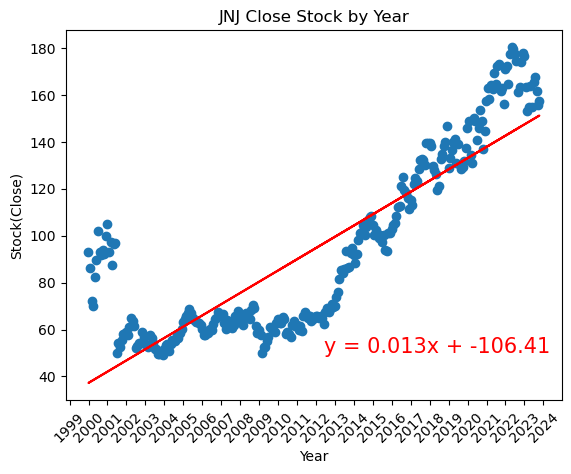

In [22]:
jnj_df_merged = graph_df.loc[graph_df['ticker'] == 'JNJ']

x = jnj_df_merged['timestamp']
y = jnj_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('JNJ Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (15500.0, 50)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/JNJ_graph.png")

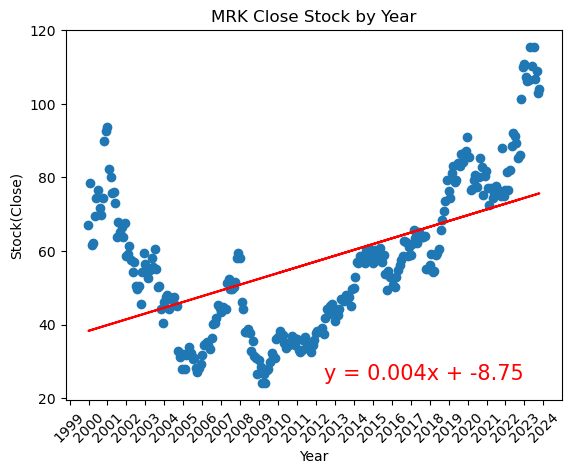

In [23]:
mrk_df_merged = graph_df.loc[graph_df['ticker'] == 'MRK']

x = mrk_df_merged['timestamp']
y = mrk_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('MRK Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (15500.0, 25)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/MRK_graph.png")

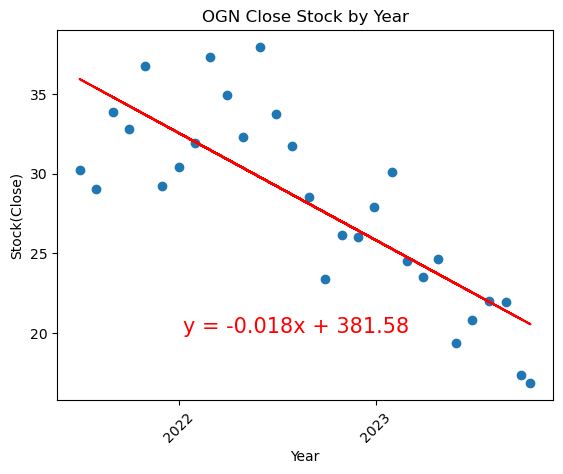

In [24]:
ogn_df_merged = graph_df.loc[graph_df['ticker'] == 'OGN']

x = ogn_df_merged['timestamp']
y = ogn_df_merged['close']

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('OGN Close Stock by Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
annotate = (19000, 20)
plt.plot_date(x, y)

lin_reg(x, y, annotate)

plt.savefig("graphs/OGN_graph.png")

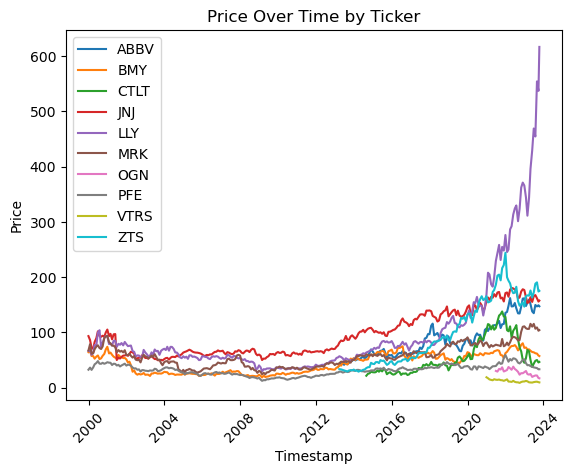

In [26]:
for ticker, group in merge_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)

plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price Over Time by Ticker')
plt.legend()
plt.xticks(rotation=45)
plt.savefig("graphs/linegraphalltime.png")

In [25]:
recent_df = merge_df[merge_df['timestamp'].dt.year >= 2018]

for ticker, group in recent_df.groupby('ticker'):
    plt.plot(group['timestamp'], group['close'], label=ticker)

plt.xlabel('Year')
plt.ylabel('Stock(Close)')
plt.title('Price Over Time by Ticker (2018 and Beyond)')
plt.legend()
plt.xticks(rotation=45)


,ticker,timestamp,open,high,low,close,volume
0,VTRS,1/29/21,18.660,18.7700,16.6100,16.99,223569475
1,VTRS,1/31/22,13.600,15.3400,13.5200,14.97,194665549
2,VTRS,1/31/23,11.190,12.1950,11.1900,12.16,191603987
3,VTRS,10/16/23,10.290,10.3700,9.2700,9.47,113735863
4,VTRS,10/29/21,13.560,14.1000,13.0850,13.35,147287052
5,VTRS,10/31/22,8.610,10.1900,8.4600,10.13,186963252
6,VTRS,11/30/21,13.370,14.8700,12.2300,12.31,236534290
7,VTRS,11/30/22,10.190,11.8400,9.5250,11.03,235691463
8,VTRS,12/30/22,11.040,11.4500,10.5550,11.13,159212811
9,VTRS,12/31/20,16.880,18.8600,16.7400,18.74,275993178
